# Mapping Coastal Water Quality Transect Data with Cartopy
Cartopy Source: https://scitools.org.uk/cartopy/docs/latest/_modules/cartopy/io/img_tiles.html. 

Here is some code that plots **geolocated** water quality sensor data on a cartopy basemap using Mapbox examples.

## Open in Colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SUPScientist/Advanced-Quantitative-Oceanography/blob/main/notebooks/Intro_07_Xarray_and_plotting_with_cartopy.ipynb)

## Technical details
- I'm using cartopy 0.20.3: https://scitools.org.uk/cartopy/docs/latest/citation.html
- Here's cartopy's example for using the Stamen tiles: https://github.com/SciTools/cartopy/blob/main/examples/web_services/image_tiles.py. 
- Lots of other options for basemaps. See Map subheading for more.

# HOMEWORK STEP 1:
In the following cell, import the four modules from slide 15 in the lecture in addition to the two already listed below.

In [1]:
import os
import datetime

## Install/uninstall proper mapping packages
We need cartopy which relies on shapely. But the wrong version of shapely will crash the program. So uninstall the wrong shapely and reinstall the right one. Explained here: https://stackoverflow.com/questions/60111684/geometry-must-be-a-point-or-linestring-error-using-cartopy. 

In [2]:
!pip install cartopy
!pip uninstall -y shapely 
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.2
Uninstalling Shapely-1.8.2:
  Successfully uninstalled Shapely-1.8.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.9/199.9 kB 166.9 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=Shapely-1.8.4-cp38-cp38-macosx_10_9_x86_64.whl size=304112 sha256=bf3003c47813cc20bb4d199d77c7e9c3cc2eea631461650aa9341ab72b41d3cb
  Stored in directory: /Users/pjb/Library/Caches/pip/wheels/11/36/96/f0a2fb0329263813dff8b9de8fa0cd91aa95582cd3aaae4ada
Successfully built shapely


In [3]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## Time zone conversions
Occasionally helpful to be able to convert from one time zone to another

In [4]:
import pytz
pacific = pytz.timezone('US/Eastern')

## Read in data using pandas
Pandas function "read_csv" pulls in a .csv file and can interpret the comma-separated values as corresponding to unique columns. 

In [5]:
data_url = 'https://raw.githubusercontent.com/SUPScientist/Advanced-Quantitative-Oceanography/main/data/EXO2%20data%20copied%20from%20Kor%20without%20headers%20-%20071622%20161323.csv'

In [6]:
df_full = pd.read_csv(data_url, parse_dates=[0,1]) # Carolina Runner/Banks Channel

df_full.tail()

,Date (MM/DD/YYYY),Time (HH:mm:ss),Time (Fract. Sec),Site Name,Cond µS/cm,Depth m,nLF Cond µS/cm,ODO % sat,ODO % CB,ODO mg/L,...,pH,pH mV,Temp °C,Vertical Position m,GPS Latitude °,GPS Longitude °,Altitude m,Battery V,Cable Pwr V,Barometer mmHg
5819,2022-07-16,2022-10-06 15:42:39,0.0,<None>,60403.7,0.195,56259.1,84.6,84.2,5.33,...,8.21,-188.3,28.454,0.226,34.20454,-77.79978,-8.1,5.12,12.1,764.9
5820,2022-07-16,2022-10-06 15:42:40,0.0,<None>,60410.9,0.197,56262.0,84.6,84.2,5.33,...,8.21,-188.4,28.458,0.230,34.20452,-77.79977,-8.0,5.12,12.1,764.9
5821,2022-07-16,2022-10-06 15:42:41,0.0,<None>,60421.3,0.198,56266.2,84.7,84.3,5.34,...,8.21,-188.4,28.462,0.213,34.20450,-77.79977,-8.3,5.12,12.1,764.9
5822,2022-07-16,2022-10-06 15:42:42,0.0,<None>,60431.4,0.199,56270.0,84.7,84.3,5.34,...,8.21,-188.5,28.468,0.222,34.20449,-77.79976,-8.4,5.12,12.1,765.0
5823,2022-07-16,2022-10-06 15:42:43,0.0,<None>,60447.2,0.200,56274.6,84.8,84.4,5.34,...,8.21,-188.5,28.476,0.224,34.20447,-77.79975,-8.4,5.12,12.1,764.9


## Column headers
Pull from these columns when choosing what to plot below

In [7]:
df_full.columns

Index(['Date (MM/DD/YYYY)', 'Time (HH:mm:ss)', 'Time (Fract. Sec)',
       'Site Name', 'Cond µS/cm', 'Depth m', 'nLF Cond µS/cm', 'ODO % sat',
       'ODO % CB', 'ODO mg/L', 'Pressure psi a', 'Sal psu', 'SpCond µS/cm',
       'TDS mg/L', 'Turbidity FNU', 'TSS mg/L', 'pH', 'pH mV', 'Temp °C',
       'Vertical Position m', 'GPS Latitude °', 'GPS Longitude °',
       'Altitude m', 'Battery V', 'Cable Pwr V', 'Barometer mmHg'],
      dtype='object')

# HOMEWORK STEP 2:
This assignment uses data from a YSI EXO2. Add a markdown (text) cell below this one and describe the specifications (range, accuracy, and resolution) for THREE of the parameters in the list above. Use the chart titled "EXO Parameter Measured" on https://www.ysi.com/exo2. Put your three parameters in a numbered list.

## Truncation
Often necessary to remove chunks of data due to known issues (e.g., sensor out of water during this time period). Check lab notebook for rationale and equate `df_trunc` to `df_full` if no truncation necessary

In [15]:
df_trunc = df_full#[19:335]
df_trunc.head()

,Date (MM/DD/YYYY),Time (HH:mm:ss),Time (Fract. Sec),Site Name,Cond µS/cm,Depth m,nLF Cond µS/cm,ODO % sat,ODO % CB,ODO mg/L,...,pH,pH mV,Temp °C,Vertical Position m,GPS Latitude °,GPS Longitude °,Altitude m,Battery V,Cable Pwr V,Barometer mmHg
0,2022-07-16,2022-10-06 14:05:41,0.0,<None>,60362.5,0.286,56573.5,85.2,84.8,5.39,...,8.4,-197.2,28.143,0.290,34.20412,-77.79978,-14.4,5.11,12.1,765.3
1,2022-07-16,2022-10-06 14:05:42,0.0,<None>,60358.0,0.286,56572.3,85.2,84.8,5.39,...,8.4,-197.2,28.141,0.303,34.20411,-77.79977,-11.3,5.11,12.1,765.2
2,2022-07-16,2022-10-06 14:05:43,0.0,<None>,60353.6,0.287,56571.3,85.1,84.7,5.39,...,8.4,-197.2,28.138,0.286,34.20411,-77.79974,-8.0,5.11,12.1,765.3
3,2022-07-16,2022-10-06 14:05:44,0.0,<None>,60349.2,0.287,56571.1,85.1,84.7,5.38,...,8.4,-197.2,28.135,0.288,34.20412,-77.79974,-10.9,5.11,12.1,765.2
4,2022-07-16,2022-10-06 14:05:45,0.0,<None>,60345.0,0.287,56570.5,85.0,84.6,5.38,...,8.4,-197.2,28.131,0.311,34.20414,-77.79976,-12.7,5.11,12.1,765.4


# HOMEWORK STEP 3
assign a value to `var_name` in the code chunk below using the column headers (i.e., the results of the command `df_full.columns`) shown above. Put it inside the single quotes. Choose an environmental variable, like conductivity, dissolved oxygen, pH, turbidity, temperature, or salinity. Not a spatial variable like latitude or time, or site name, or battery, or power. 

## Get parameters of interest and set limits

In [9]:
lat = df_trunc["GPS Latitude °"]
lon = df_trunc["GPS Longitude °"]
var_name = '' # selected from columns above
plot_var = df_trunc[var_name]
plot_var_min  = min(plot_var) # set manually if desired
plot_var_max  = max(plot_var)
fontsize = 16

## Time-series plot of parameter of interest

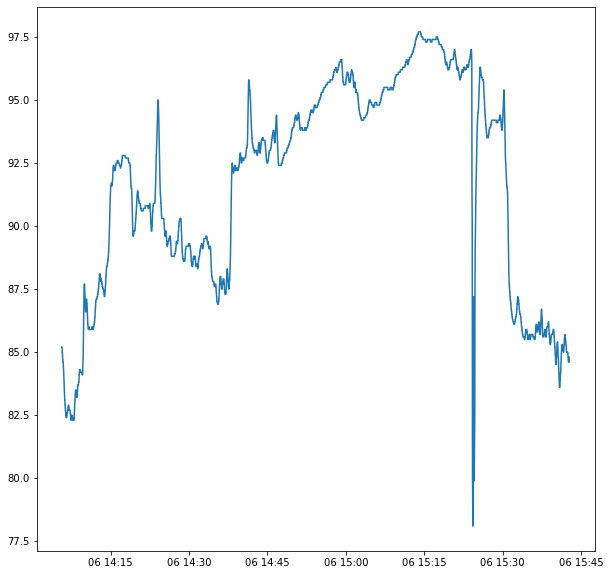

In [10]:
fig, axs = plt.subplots(figsize = (10, 10))
axs.plot(df_trunc['Time (HH:mm:ss)'], df_trunc[var_name])

## Map of variable of interest
- Image tile options via Cartopy are currently buried in the API under cartopy.io.img_tiles described here: https://scitools.org.uk/cartopy/docs/latest/_modules/cartopy/io/img_tiles.html. Scroll down to see different options under the different classes. Change the class 
- Here are some examples of the Mapbox style offerings: https://docs.mapbox.com/api/maps/styles/. Change `map_id` to use others.
- See also https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html for formatting.

### Options
See below for several examples. Then in subsequent cell, define which choice you'd like by setting `base_layer` and `tile_zoom` to match one of these examples.

In [11]:
# Map options: (un)comment blocks corresponding to choice and check to make sure base_layer and tile_zoom are defined
## Stamen
base_layer_stamen = cimgt.Stamen('terrain-background')
tile_zoom_stamen = 12

## Mapbox: Needs an access token; comment out for now
# map_id = 'satellite-streets-v11'
# base_layer_mapbox = cimgt.MapboxTiles(mapbox_access_token, map_id=map_id)
# tile_zoom_mapbox = 15

## Open Street Maps
base_layer_OSM = cimgt.OSM()
tile_zoom_OSM = 15

### Define your choices
Select corresponding options from prior cell

In [16]:
## DEFINE BASE_LAYER AND TILE_ZOOM HERE!
base_layer = base_layer_OSM
tile_zoom = tile_zoom_OSM

### Create plot
Using defined parameters from previous cell, create the plot

In [17]:
# Define CRS
crs = ccrs.PlateCarree() # won't work without this below

## Set plot lims
# Get current corners
lllat = np.nanmin(lat)
lllon = np.nanmin(lon)
urlat = np.nanmax(lat)
urlon = np.nanmax(lon)

# Calculate range in spatial vars
lat_diff = urlat-lllat
lon_diff = urlon-lllon

# How much padding to add--subjective
lat_frac = 0.1
lon_frac = 0.1

# Calculate new plot corners
lllat_plot = lllat-lat_diff*lat_frac
urlat_plot = urlat+lat_diff*lat_frac
lllon_plot = lllon-lon_diff*lon_frac
urlon_plot = urlon+lon_diff*lon_frac

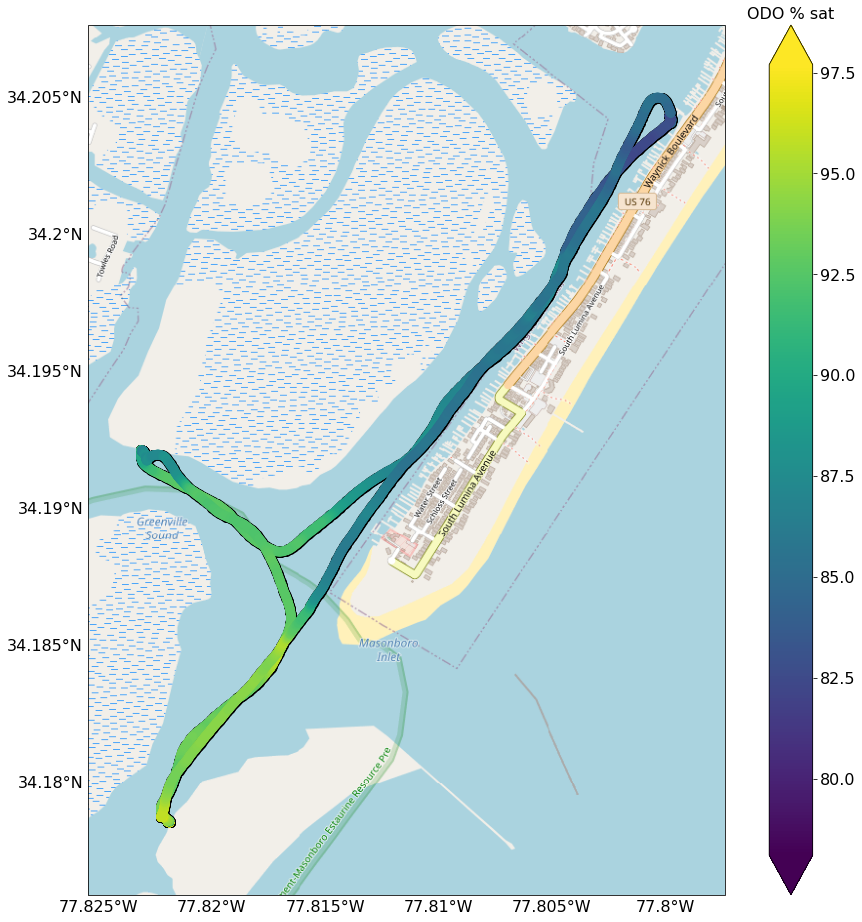

In [18]:
fig = plt.figure(figsize = (16, 16))

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=base_layer.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([lllon_plot, urlon_plot, lllat_plot, urlat_plot], crs=crs)

# Add the Stamen data at certain zoom level.
ax.add_image(base_layer, tile_zoom)

# Plot data
sc = plt.scatter(lon, lat, c = 'black', s = 100, transform = crs)
sc = plt.scatter(lon, lat, c = plot_var, s = 75, transform = crs, vmin = plot_var_min, vmax = plot_var_max)
cb = plt.colorbar(sc, extend = 'both')
cb.ax.tick_params(labelsize = fontsize) 
cb.ax.set_title(var_name, fontsize = fontsize)

# Format gridlines
gl = ax.gridlines(crs=crs, draw_labels=True,
                  linewidth=2, color='white', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
# gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': fontsize}#, 'color': 'gray'}
gl.ylabel_style = {'size': fontsize}#, 'color': 'gray'}

# plt.savefig(var_name+'.png', dpi = 300) # (un)comment depending on preference for saving figure locally

# HOMEWORK STEP 4
In a markdown/text chunk below,
- Describe the variability that you see in the parameter that you chose to map
- Why do you think it varies the way that it does (i.e., what physical or biological or human impact is causing this pattern)?
- Where is this location (put coordinates into Google Maps or similar web mapping tool)?